In [ ]:
import pandas as pd

customers_df = pd.read_csv('/content/Updated_Customers.csv')
products_df = pd.read_csv('/content/Products - Products.csv')
transactions_df = pd.read_csv('/content/Transactions - Transactions.csv')

customer_transactions_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')

full_data_df = pd.merge(customer_transactions_df, products_df, on='ProductID', how='left')

full_data_df['TransactionDate'] = pd.to_datetime(full_data_df['TransactionDate'], errors='coerce')
print("Missing Values Before Cleaning:")
print(full_data_df.isnull().sum())

full_data_df.drop(columns=['Price_x'], inplace=True)
full_data_df.rename(columns={'Price_y': 'Price'}, inplace=True)

full_data_df.dropna(inplace=True)

full_data_df['Price'] = pd.to_numeric(full_data_df['Price'], errors='coerce')
full_data_df['Quantity'] = pd.to_numeric(full_data_df['Quantity'], errors='coerce')
full_data_df['TotalValue'] = pd.to_numeric(full_data_df['TotalValue'], errors='coerce')

print("Data Types After Cleaning:")
print(full_data_df.dtypes)
print("Missing Values After Cleaning:")
print(full_data_df.isnull().sum())
full_data_df.to_csv('Cleaned_Merged_Customer_Product_Transactions.csv', index=False)

print("Cleaned Data Sample:")
print(full_data_df.head())

In [20]:
combined_df = pd.read_csv('/content/Cleaned_Merged_Customer_Product_Transactions.csv')
combined_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,CustomerName,Region,SignupDate,ProductName,Category,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,Andrea Jenkins,Europe,03/12/2022,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,Brittany Harvey,Asia,04/09/2024,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,Kathryn Stevens,Europe,04/04/2024,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,Travis Campbell,South America,11/04/2024,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,Timothy Perez,Europe,15/03/2022,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [22]:
missing_data = combined_df.isnull().sum()
combined_df.dropna(subset=['CustomerID', 'TransactionID', 'ProductID', 'TotalValue'], inplace=True)
combined_df['CustomerName'].fillna('Unknown', inplace=True)
combined_df['Region'].fillna('Unknown', inplace=True)
missing_data_after_cleaning = combined_df.isnull().sum()
print(missing_data_after_cleaning)

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price              0
dtype: int64


<ipython-input-22-aa2b8e8aef47>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['CustomerName'].fillna('Unknown', inplace=True)
<ipython-input-22-aa2b8e8aef47>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

Davies-Bouldin Index for 3 clusters: 0.89


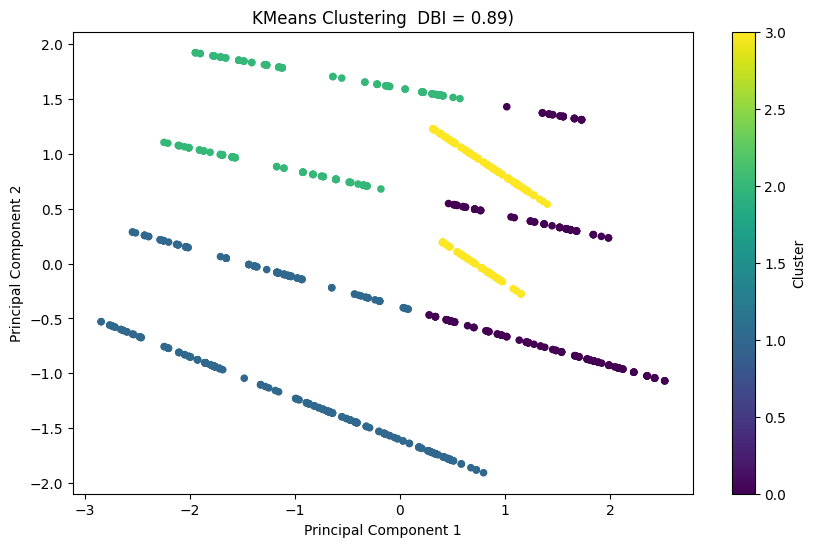

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt


data_path = '/content/Cleaned_Merged_Customer_Product_Transactions.csv'
customer_data = pd.read_csv(data_path)

numeric_cols = customer_data.select_dtypes(include=[np.number]).columns
customer_data[numeric_cols] = customer_data[numeric_cols].fillna(customer_data[numeric_cols].mean())

features = ['Quantity', 'TotalValue', 'Price']
customer_data_clean = customer_data[features]

scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data_clean)

pca = PCA(n_components=2)
customer_data_pca = pca.fit_transform(customer_data_scaled)

kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

dbi_score = davies_bouldin_score(customer_data_scaled, customer_data['Cluster'])
print(f"Davies-Bouldin Index for 3 clusters: {dbi_score:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(customer_data_pca[:, 0], customer_data_pca[:, 1], c=customer_data['Cluster'], cmap='viridis', s=20)
plt.title("KMeans Clustering  DBI = 0.89)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue     CustomerName         Region  SignupDate  \
0      300.68   Andrea Jenkins         Europe  03/12/2022   
1      300.68  Brittany Harvey           Asia  04/09/2024   
2      300.68  Kathryn Stevens         Europe  04/04/2024   
3      601.36  Travis Campbell  South America  11/04/2024   
4      902.04    Timothy Perez         Europe  15/03/2022   

                       ProductName     Category   Price  
0  ComfortLiving Bluetooth Speaker  Electronics  300.68  
1  ComfortLiving Bluetooth Speaker  Electronics  300.68  
2  ComfortLiving Bluetooth Speak

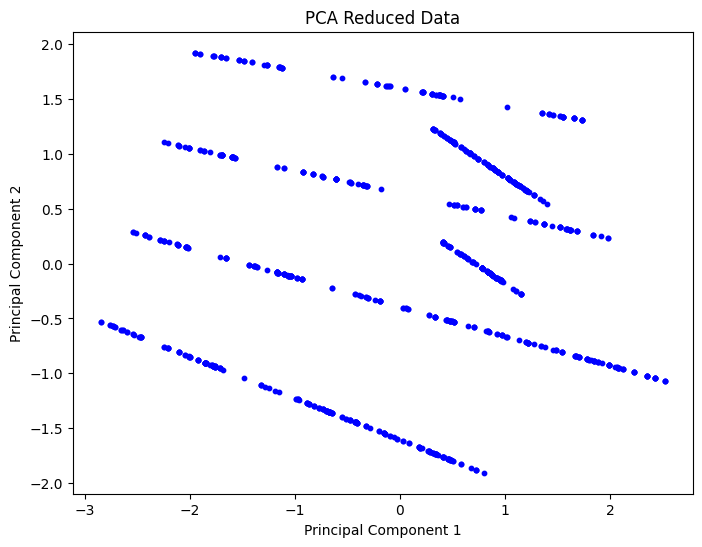

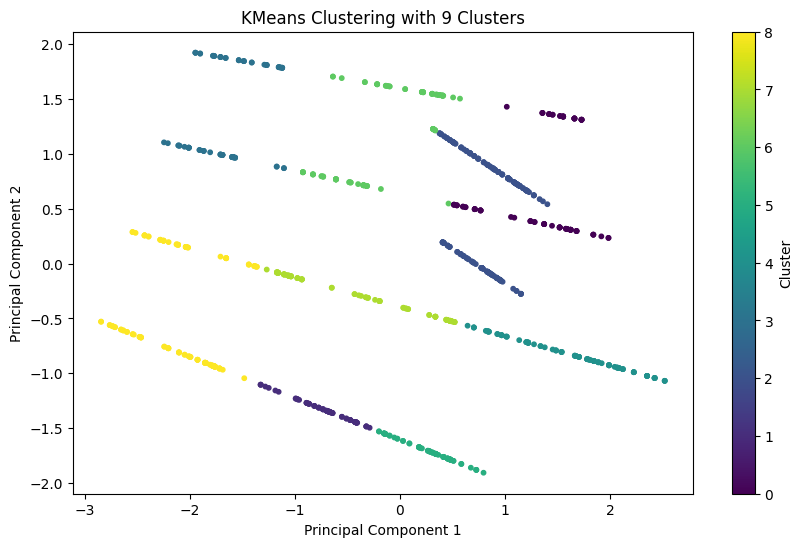

Final Davies-Bouldin Index for 9 clusters: 0.7212946659013973


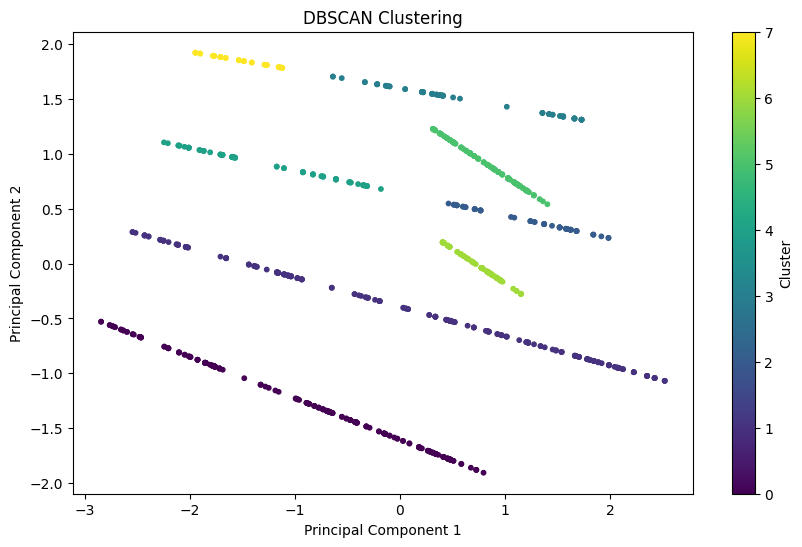

DBI for DBSCAN clustering: 1.1934938681883926


In [39]:
data_path = '/content/Cleaned_Merged_Customer_Product_Transactions.csv'
customer_data = pd.read_csv(data_path)

print(customer_data.head())

print(customer_data.isnull().sum())
numeric_cols = customer_data.select_dtypes(include=[np.number]).columns

customer_data[numeric_cols] = customer_data[numeric_cols].fillna(customer_data[numeric_cols].mean())

print(customer_data.isnull().sum())

features = ['Quantity', 'TotalValue', 'Price']

customer_data_clean = customer_data[features]

scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data_clean)

print(customer_data_scaled[:5])

pca = PCA(n_components=2)
customer_data_pca = pca.fit_transform(customer_data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(customer_data_pca[:, 0], customer_data_pca[:, 1], s=10, color='blue')
plt.title("PCA Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

optimal_clusters = 9

kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans_final.fit_predict(customer_data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(customer_data_pca[:, 0], customer_data_pca[:, 1], c=customer_data['Cluster'], cmap='viridis', s=10)
plt.title(f"KMeans Clustering with {optimal_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

final_dbi = davies_bouldin_score(customer_data_scaled, customer_data['Cluster'])
print(f"Final Davies-Bouldin Index for {optimal_clusters} clusters: {final_dbi}")

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
customer_data['DBSCAN_Cluster'] = dbscan.fit_predict(customer_data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(customer_data_pca[:, 0], customer_data_pca[:, 1], c=customer_data['DBSCAN_Cluster'], cmap='viridis', s=10)
plt.title("DBSCAN Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

dbscan_dbi = davies_bouldin_score(customer_data_scaled[customer_data['DBSCAN_Cluster'] != -1],
                                  customer_data['DBSCAN_Cluster'][customer_data['DBSCAN_Cluster'] != -1])
print(f"DBI for DBSCAN clustering: {dbscan_dbi}")
